# Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [70]:
data=pd.read_csv("Haryana avg data .csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1461 non-null   object 
 1   To Date    1461 non-null   object 
 2   PM2.5      1461 non-null   float64
 3   PM10       1461 non-null   float64
 4   NO2        1461 non-null   float64
 5   SO2        1461 non-null   float64
 6   Ozone      1461 non-null   float64
 7   RH         1461 non-null   float64
 8   WS         1461 non-null   float64
 9   RF         1461 non-null   float64
dtypes: float64(8), object(2)
memory usage: 114.3+ KB
None
             From Date           To Date       PM2.5        PM10        NO2  \
0  2019-01-01 00:00:00  02-01-2019 00:00  162.931889  253.225417  41.132833   
1  2019-01-02 00:00:00  03-01-2019 00:00  166.560444  240.560179  38.092333   
2  2019-01-03 00:00:00  04-01-2019 00:00  144.153389  219.586845  34.795389   
3  2019-01-04 00:00:00  05-01-2019 00:

In [3]:
data.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'RH',
       'WS', 'RF'],
      dtype='object')

# Missing values Detection

In [4]:
# Check for missing values
print(data.isnull().sum())

# Convert date columns to datetime format
data['from_date'] = pd.to_datetime(data['From Date'])
data['to_date'] = pd.to_datetime(data['To Date'])


From Date    0
To Date      0
PM2.5        0
PM10         0
NO2          0
SO2          0
Ozone        0
RH           0
WS           0
RF           0
dtype: int64


# Statistical Summary

In [5]:
# Summary statistics
print(data.describe())


             PM2.5         PM10          NO2          SO2        Ozone  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     74.559620   150.325092    23.601061    13.177683    32.332317   
std      42.709160    69.216875     8.048458     3.075401     7.465743   
min      15.200667    32.908036    10.599667     6.855889    14.929167   
25%      42.147389    94.052143    16.956111    10.855000    27.046000   
50%      66.195889   145.078929    22.353556    12.662000    30.982333   
75%      94.817111   195.579464    28.370778    15.132167    37.042333   
max     328.608333   481.373214    61.739667    25.239333    59.771222   

                RH           WS           RF  
count  1461.000000  1461.000000  1461.000000  
mean     53.815513     1.580466     0.024263  
std      16.156023     0.393283     0.074302  
min      12.962444     0.665167     0.000000  
25%      43.890333     1.298333     0.000000  
50%      56.587333     1.516667     0.005200  
75% 

# Correlation Between the Parameters

/var/folders/jv/n8f2jj8x0jg80w8yfphlv3vh0000gn/T/ipykernel_40361/3315244778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


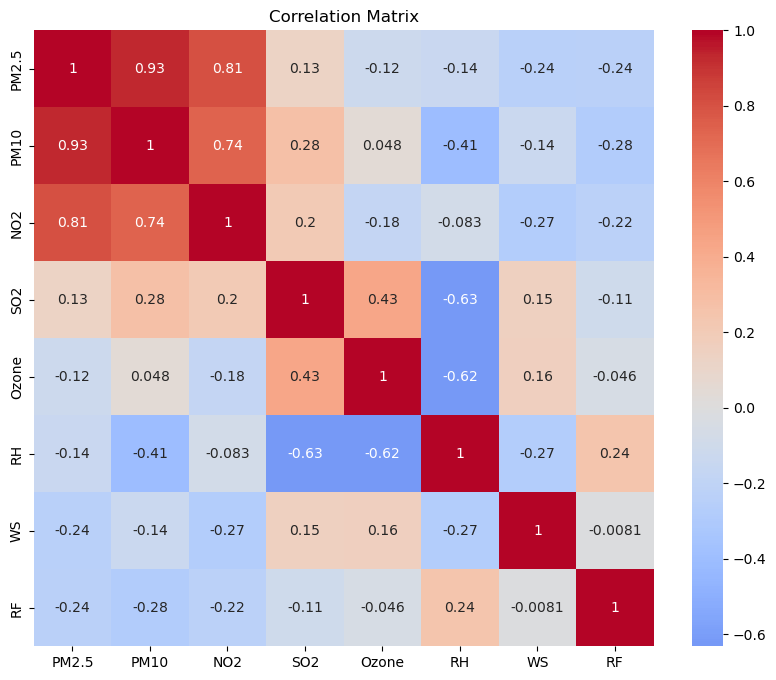

In [6]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Air Pollution level over time

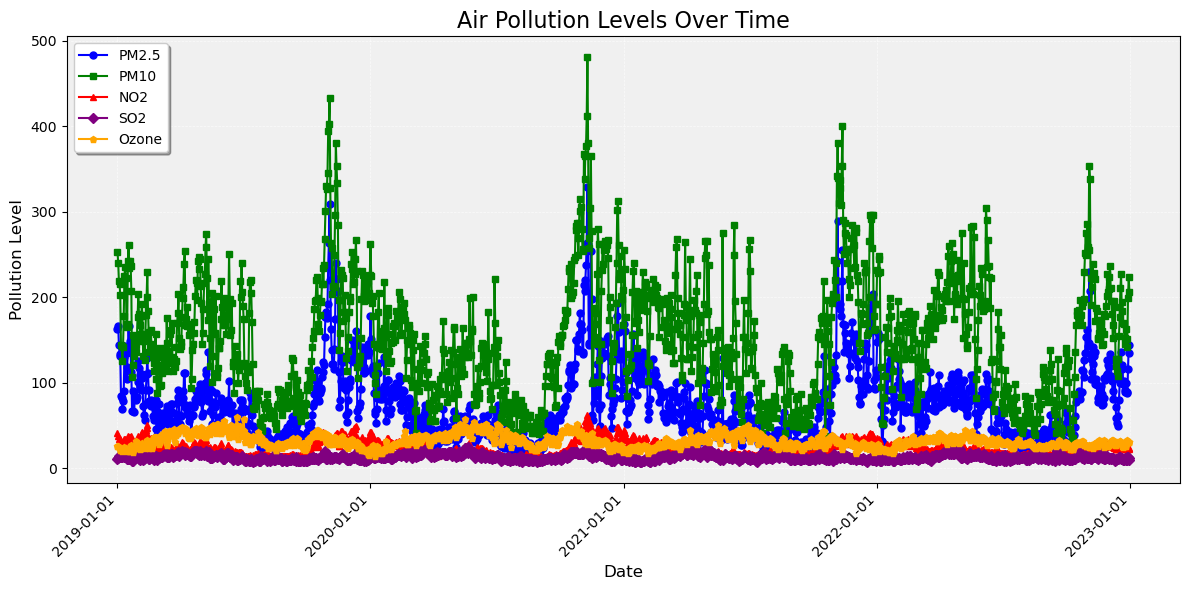

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'From Date' to datetime format
data['From Date'] = pd.to_datetime(data['From Date'])

# Line plot of pollution levels over time
plt.figure(figsize=(12, 6))

plt.plot(data['From Date'], data['PM2.5'], label='PM2.5', marker='o', markersize=5, color='blue')
plt.plot(data['From Date'], data['PM10'], label='PM10', marker='s', markersize=5, color='green')
plt.plot(data['From Date'], data['NO2'], label='NO2', marker='^', markersize=5, color='red')
plt.plot(data['From Date'], data['SO2'], label='SO2', marker='D', markersize=5, color='purple')
plt.plot(data['From Date'], data['Ozone'], label='Ozone', marker='p', markersize=5, color='orange')

plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Pollution Levels Over Time')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend with a shadow
plt.legend(shadow=True, loc='upper left')

# Add a background color to the plot
plt.gca().set_facecolor('#f0f0f0')

# Add a title and labels
plt.title('Air Pollution Levels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pollution Level', fontsize=12)

# Add a grid for better readability
plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



# Pairplot for pollution variables

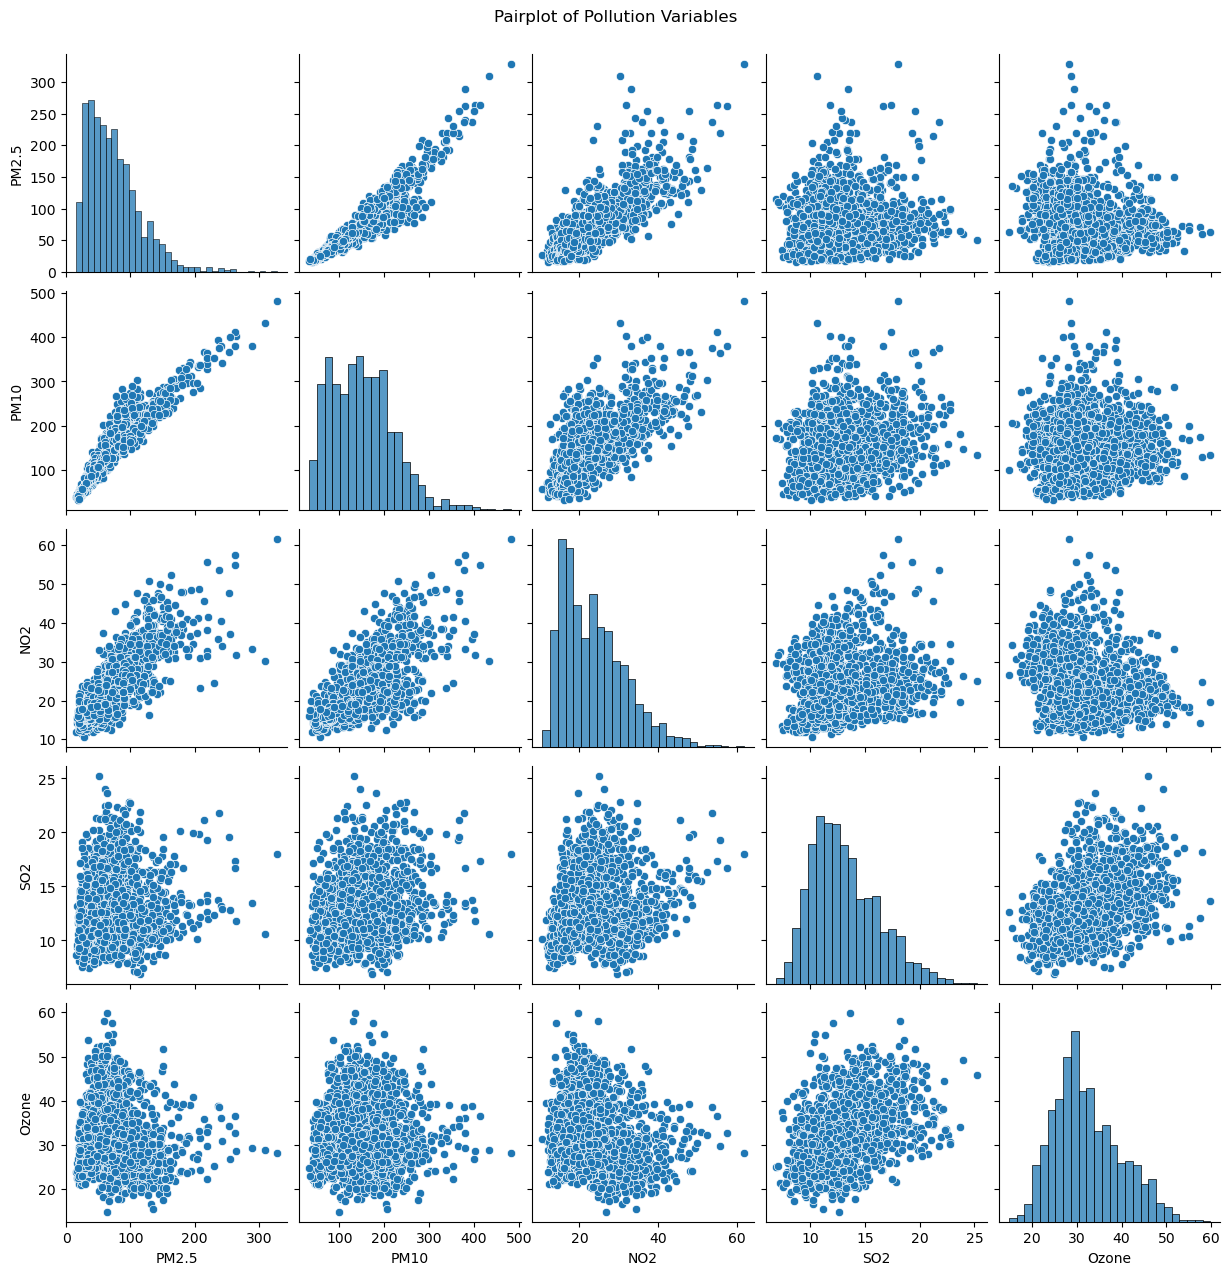

In [8]:
# Pairplot for pollution variables
sns.pairplot(data=data[['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone']])
plt.suptitle('Pairplot of Pollution Variables', y=1.02)
plt.show()

# Outlier Detection

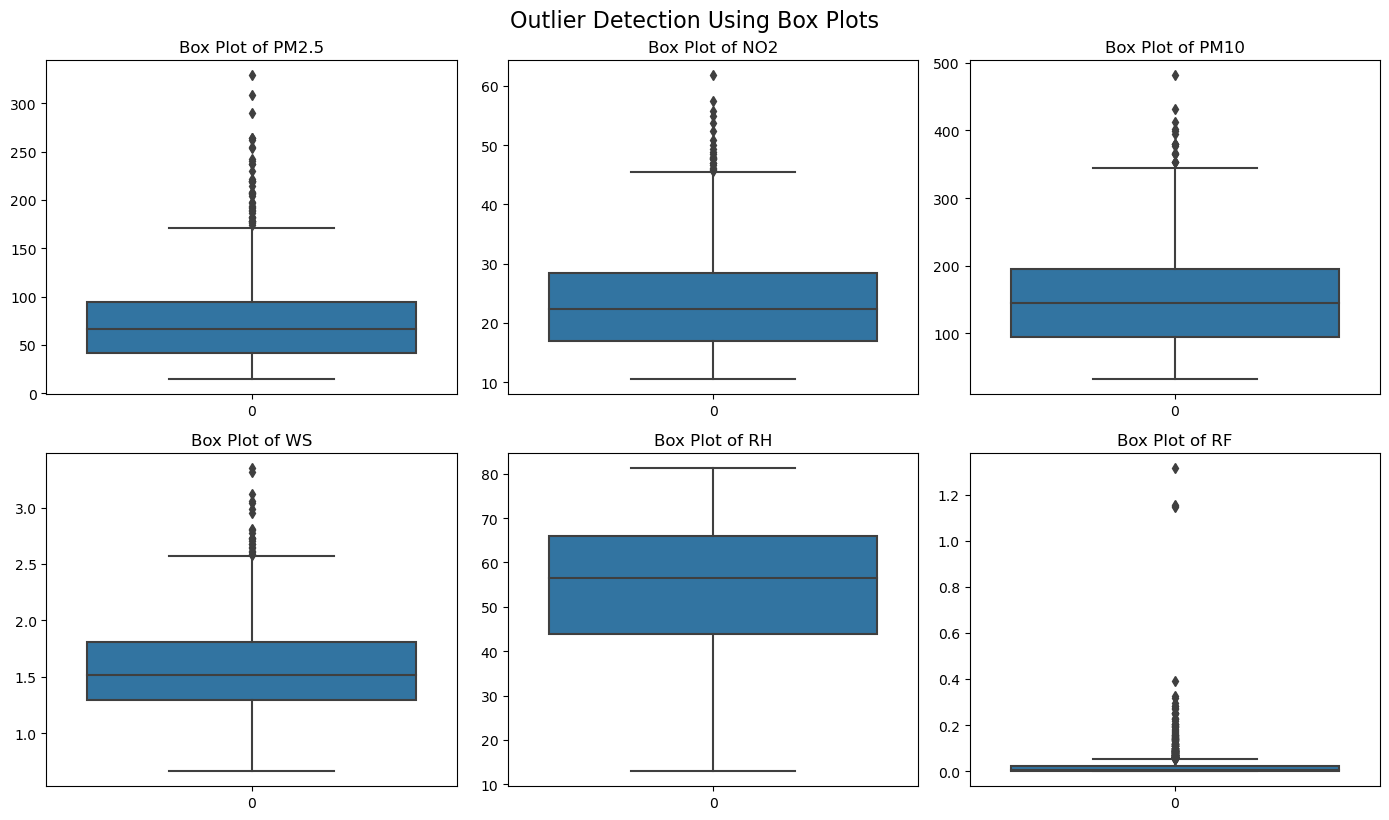

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns containing numerical data for outlier detection
numeric_columns = ['PM2.5', 'NO2', 'PM10', 'WS', 'RH', 'RF']

# Calculate z-scores for outlier detection
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()
z_scores

# Set a threshold for identifying outliers (e.g., z-score > 3)
outlier_threshold = 3

# Create a DataFrame to store outlier information
outliers_df = pd.DataFrame(index=data.index)

# Identify outliers using z-scores and visualize them using box plots
plt.figure(figsize=(14, 8))
for i, column in enumerate(numeric_columns, start=1):
    outliers_df[f'{column}_outlier'] = np.abs(z_scores[column]) > outlier_threshold
    
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.suptitle('Outlier Detection Using Box Plots', y=1.02, fontsize=16)
plt.show()


# Handling Outliers

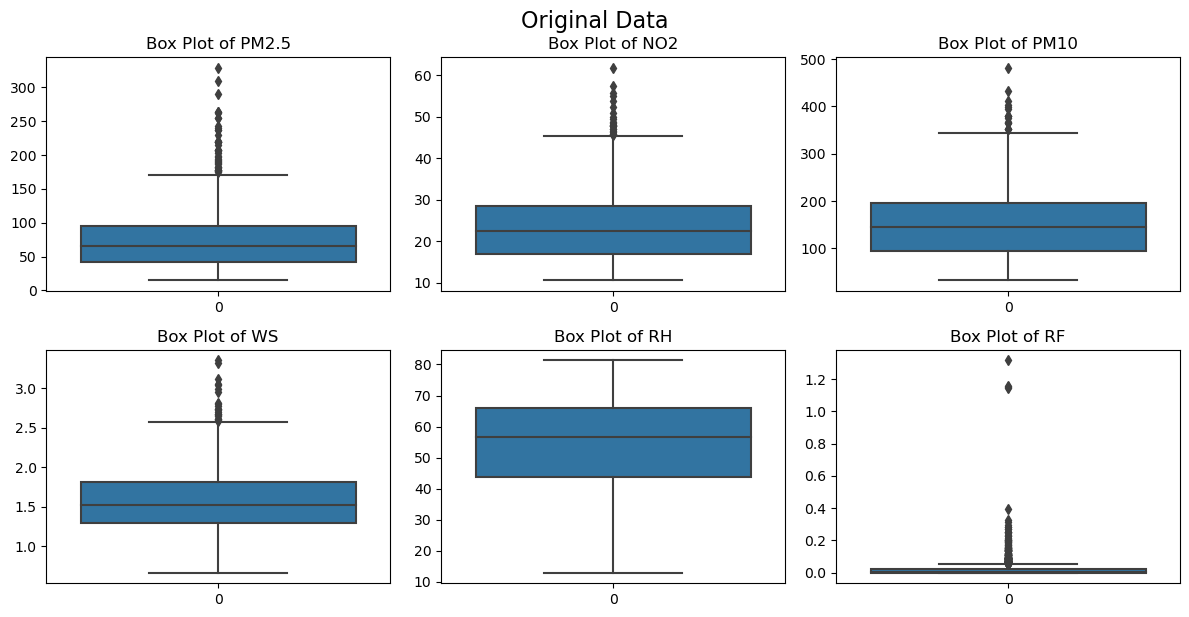

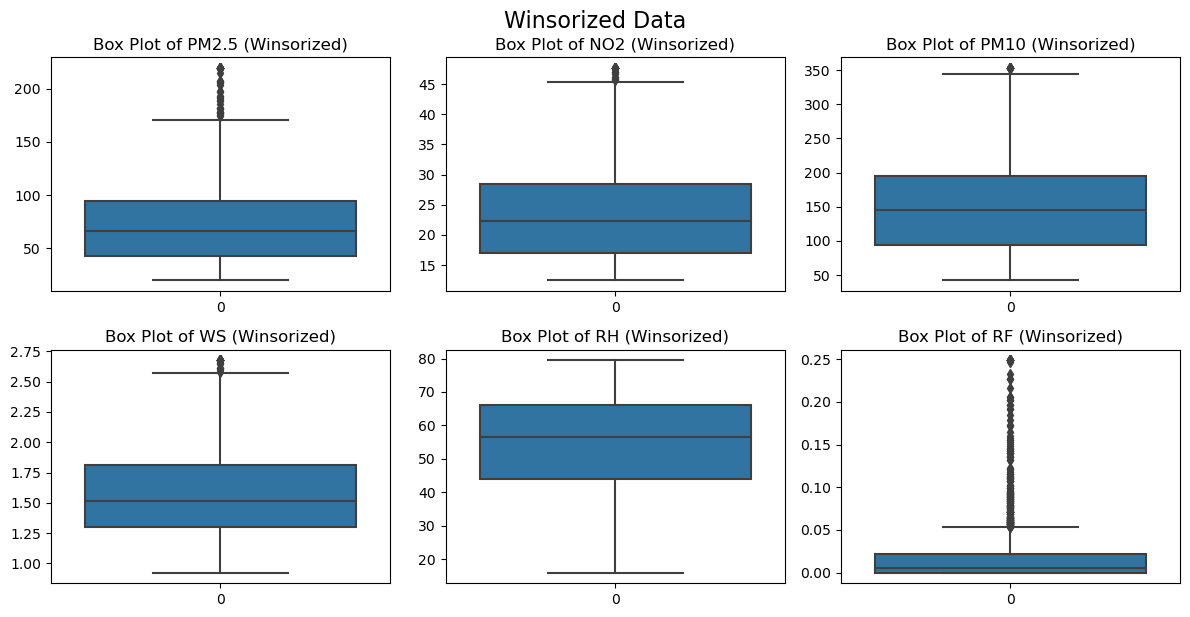

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Assuming 'data' is your DataFrame

# Define the columns containing numerical data for outlier handling
numeric_columns = ['PM2.5', 'NO2', 'PM10', 'WS', 'RH', 'RF']

# Define the lower and upper percentiles for Winsorization (e.g., 1st and 99th percentiles)
lower_percentile = 1
upper_percentile = 99

# Apply Winsorization to handle outliers
winsorized_data = data.copy()
for column in numeric_columns:
    lower_limit = np.percentile(data[column], lower_percentile)
    upper_limit = np.percentile(data[column], upper_percentile)
    winsorized_data[column] = np.clip(data[column], lower_limit, upper_limit)

# Visualize original and winsorized data using box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()
plt.suptitle('Original Data', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=winsorized_data[column])
    plt.title(f'Box Plot of {column} (Winsorized)')
    plt.tight_layout()
plt.suptitle('Winsorized Data', y=1.02, fontsize=16)
plt.show()


# Distribution of Rainfall, humidity and windspeed

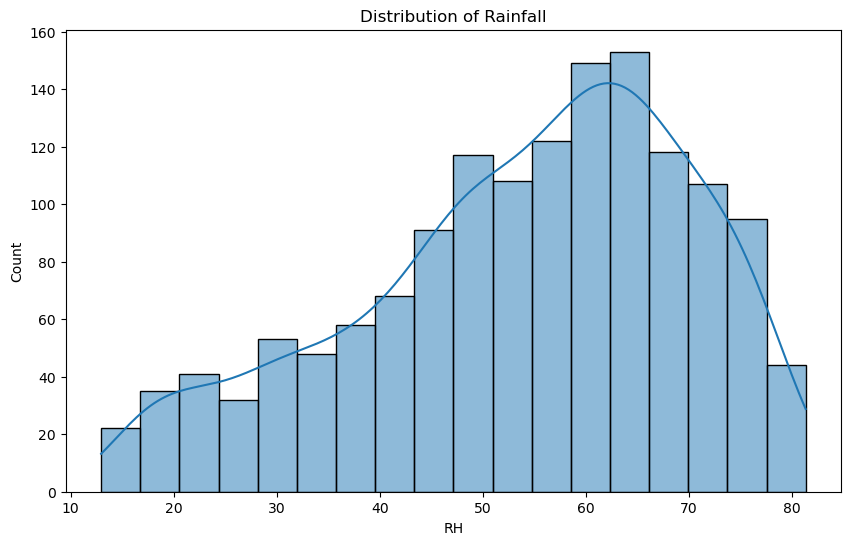

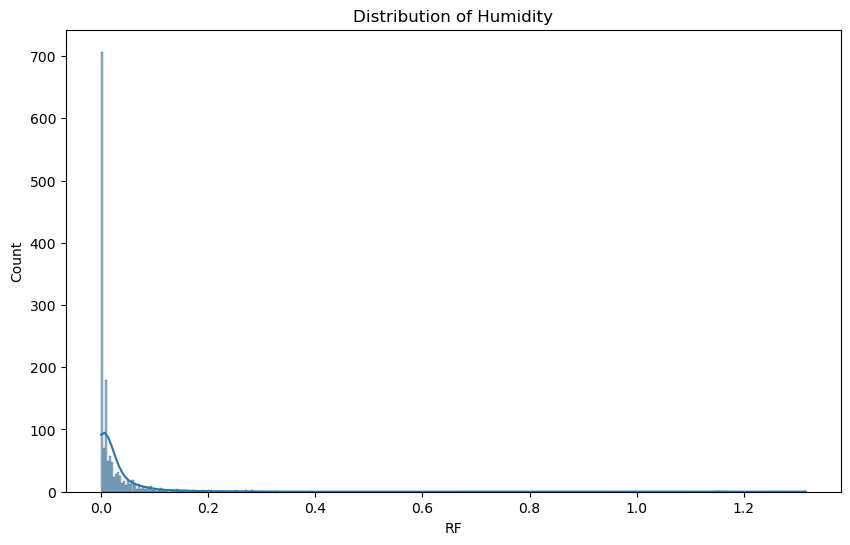

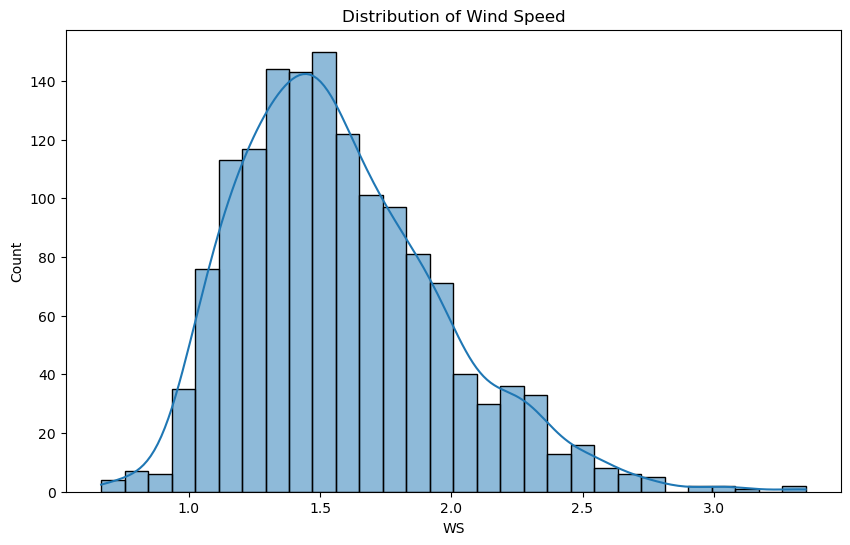

In [11]:
# Distribution of rainfall, humidity, and wind speed
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='RH', kde=True)
plt.title('Distribution of Rainfall')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='RF', kde=True)
plt.title('Distribution of Humidity')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='WS',kde=True)
plt.title('Distribution of Wind Speed')
plt.show()

# Normalizing Data using MinMaxScaler

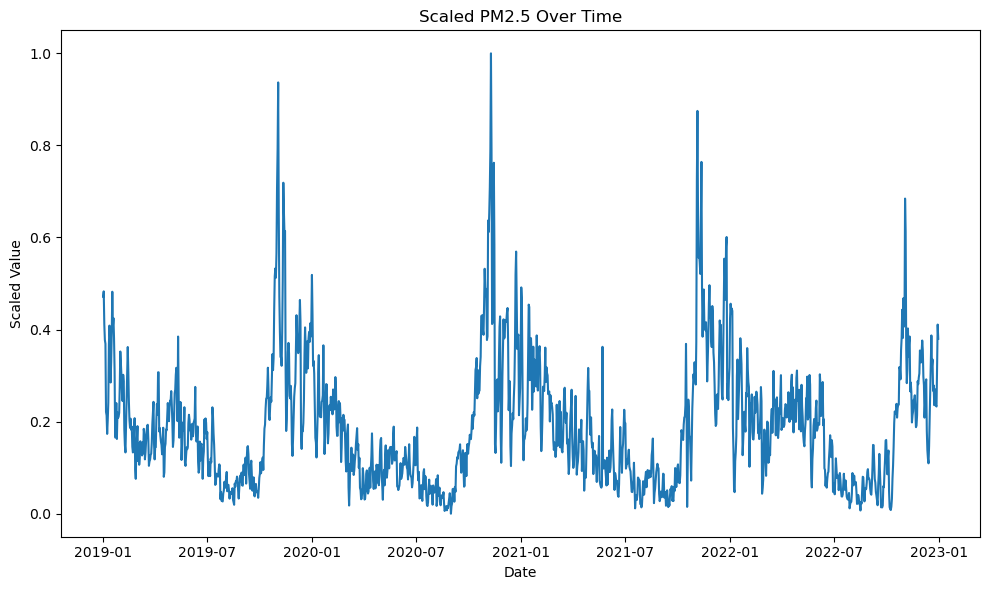

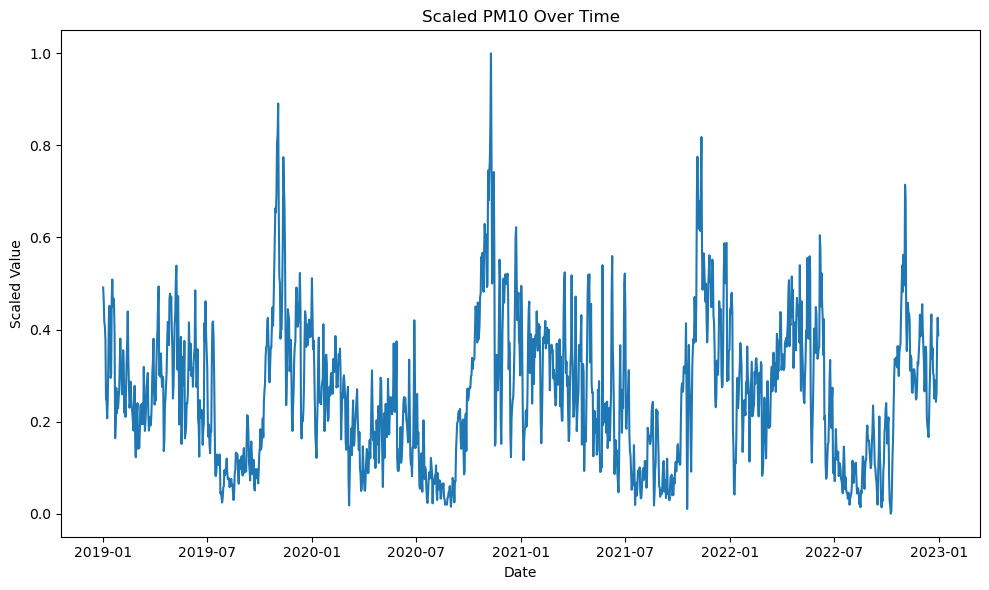

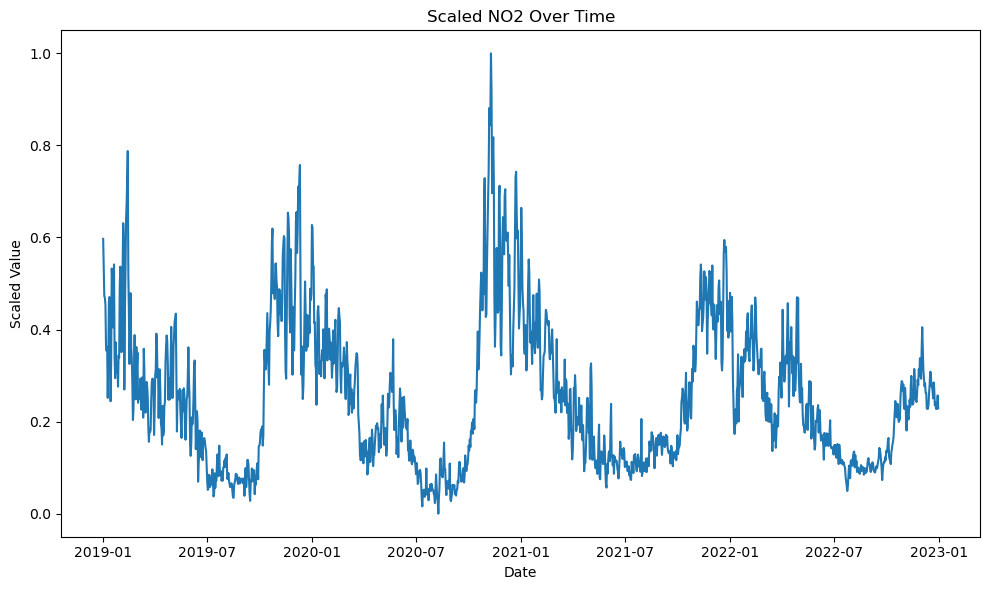

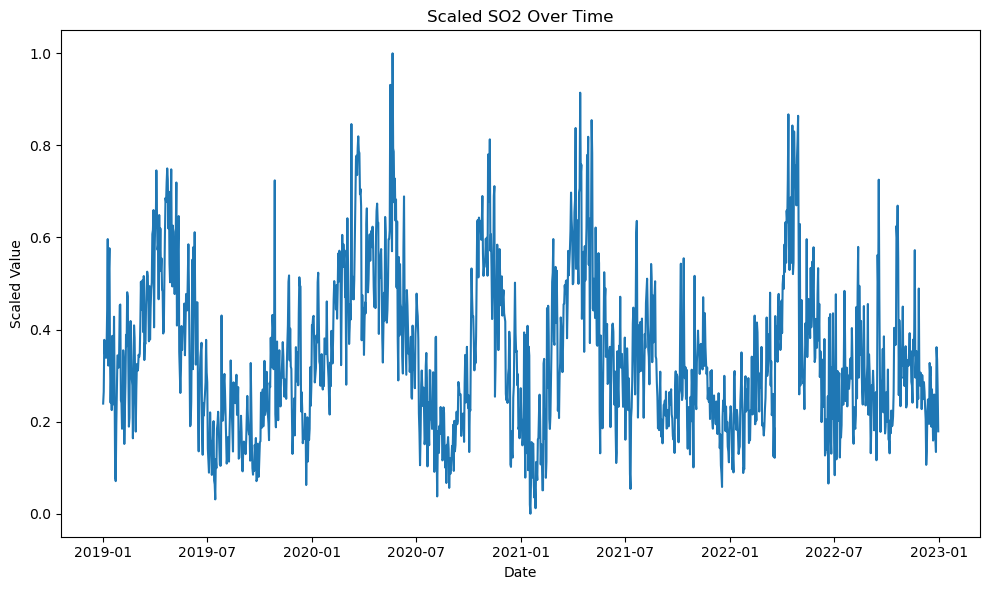

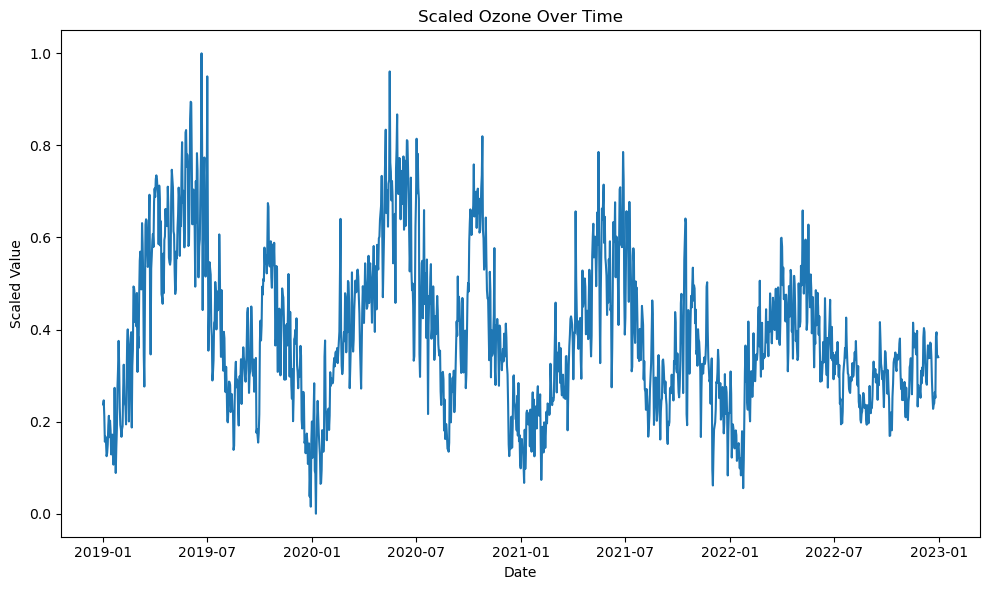

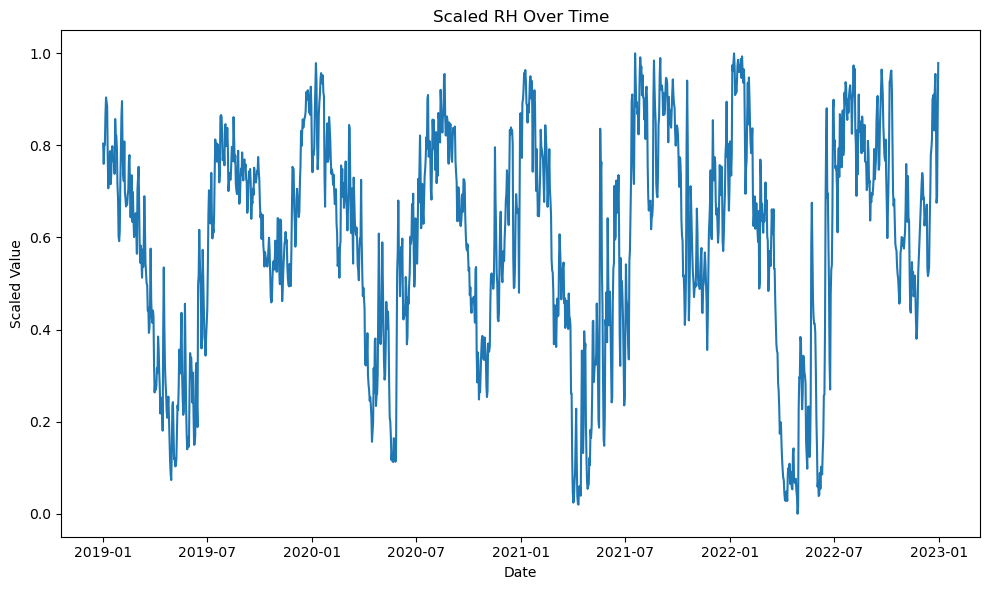

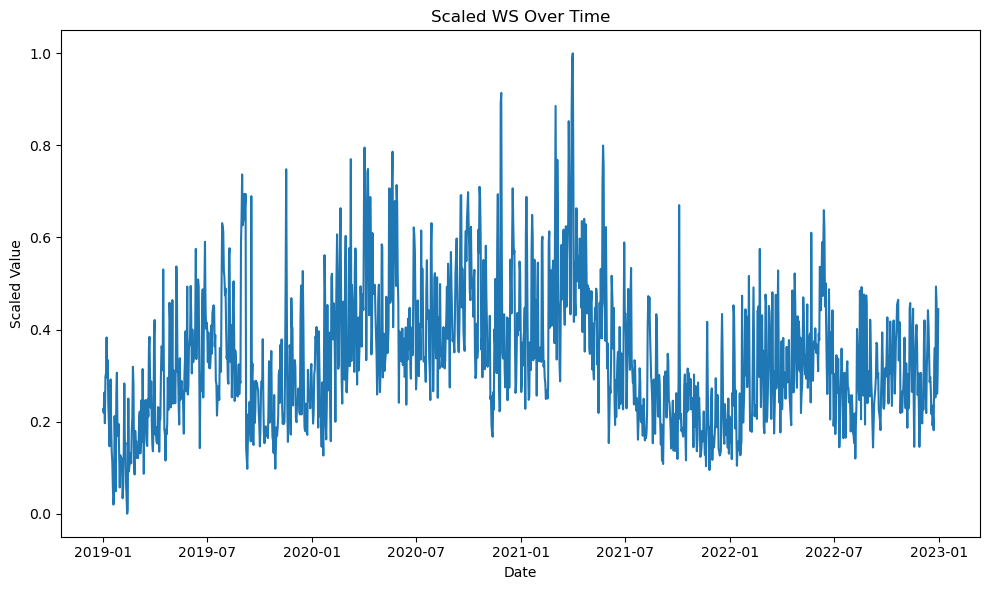

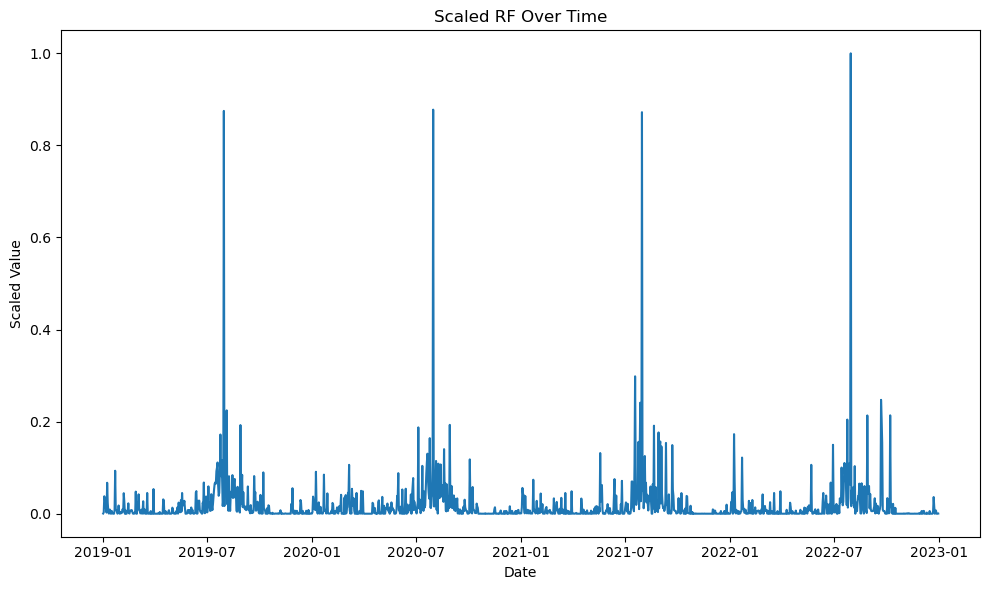

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame

# Convert date columns to datetime format
data['From Date'] = pd.to_datetime(data['From Date'])
data['to_date'] = pd.to_datetime(data['to_date'])

# Select columns for Min-Max Scaling (excluding date columns)
columns_to_scale = ['PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'RH', 'WS', 'RF']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Convert the scaled data array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Plot scaled data for each column separately
for column in columns_to_scale:
    plt.figure(figsize=(10, 6))
    plt.plot(data['From Date'], scaled_df[column])
    plt.title(f'Scaled {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.tight_layout()
    plt.show()


# Trend Analysis- Time Series Plot

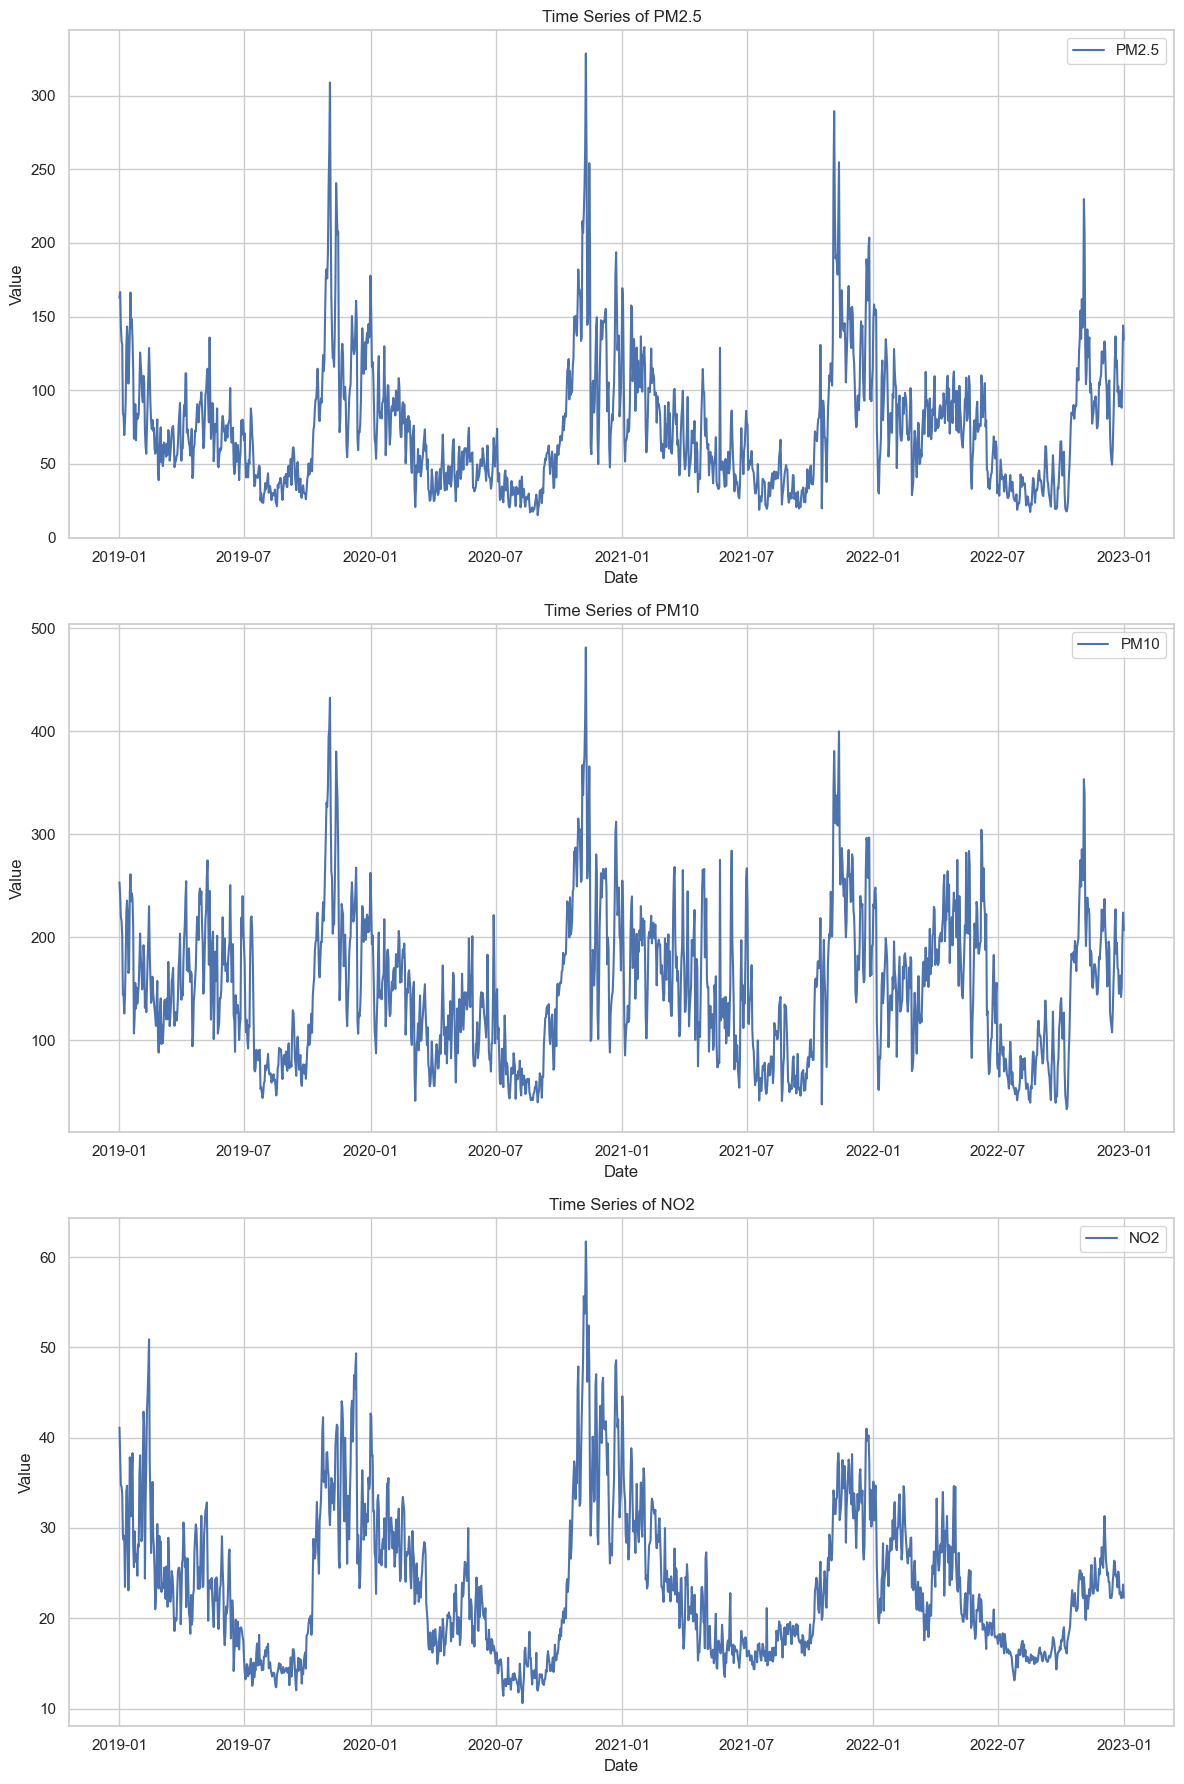

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is your DataFrame

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

parameters = ['PM2.5', 'PM10', 'NO2']
variables = ['WS', 'RH', 'RF']

# Loop through parameters and plot
for i, param in enumerate(parameters):
    sns.lineplot(x='From Date', y=param, data=data, ax=axes[i], label=param)
    axes[i].set_title(f'Time Series of {param}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Relationship Analysis- Scatter Plots and Correlation:

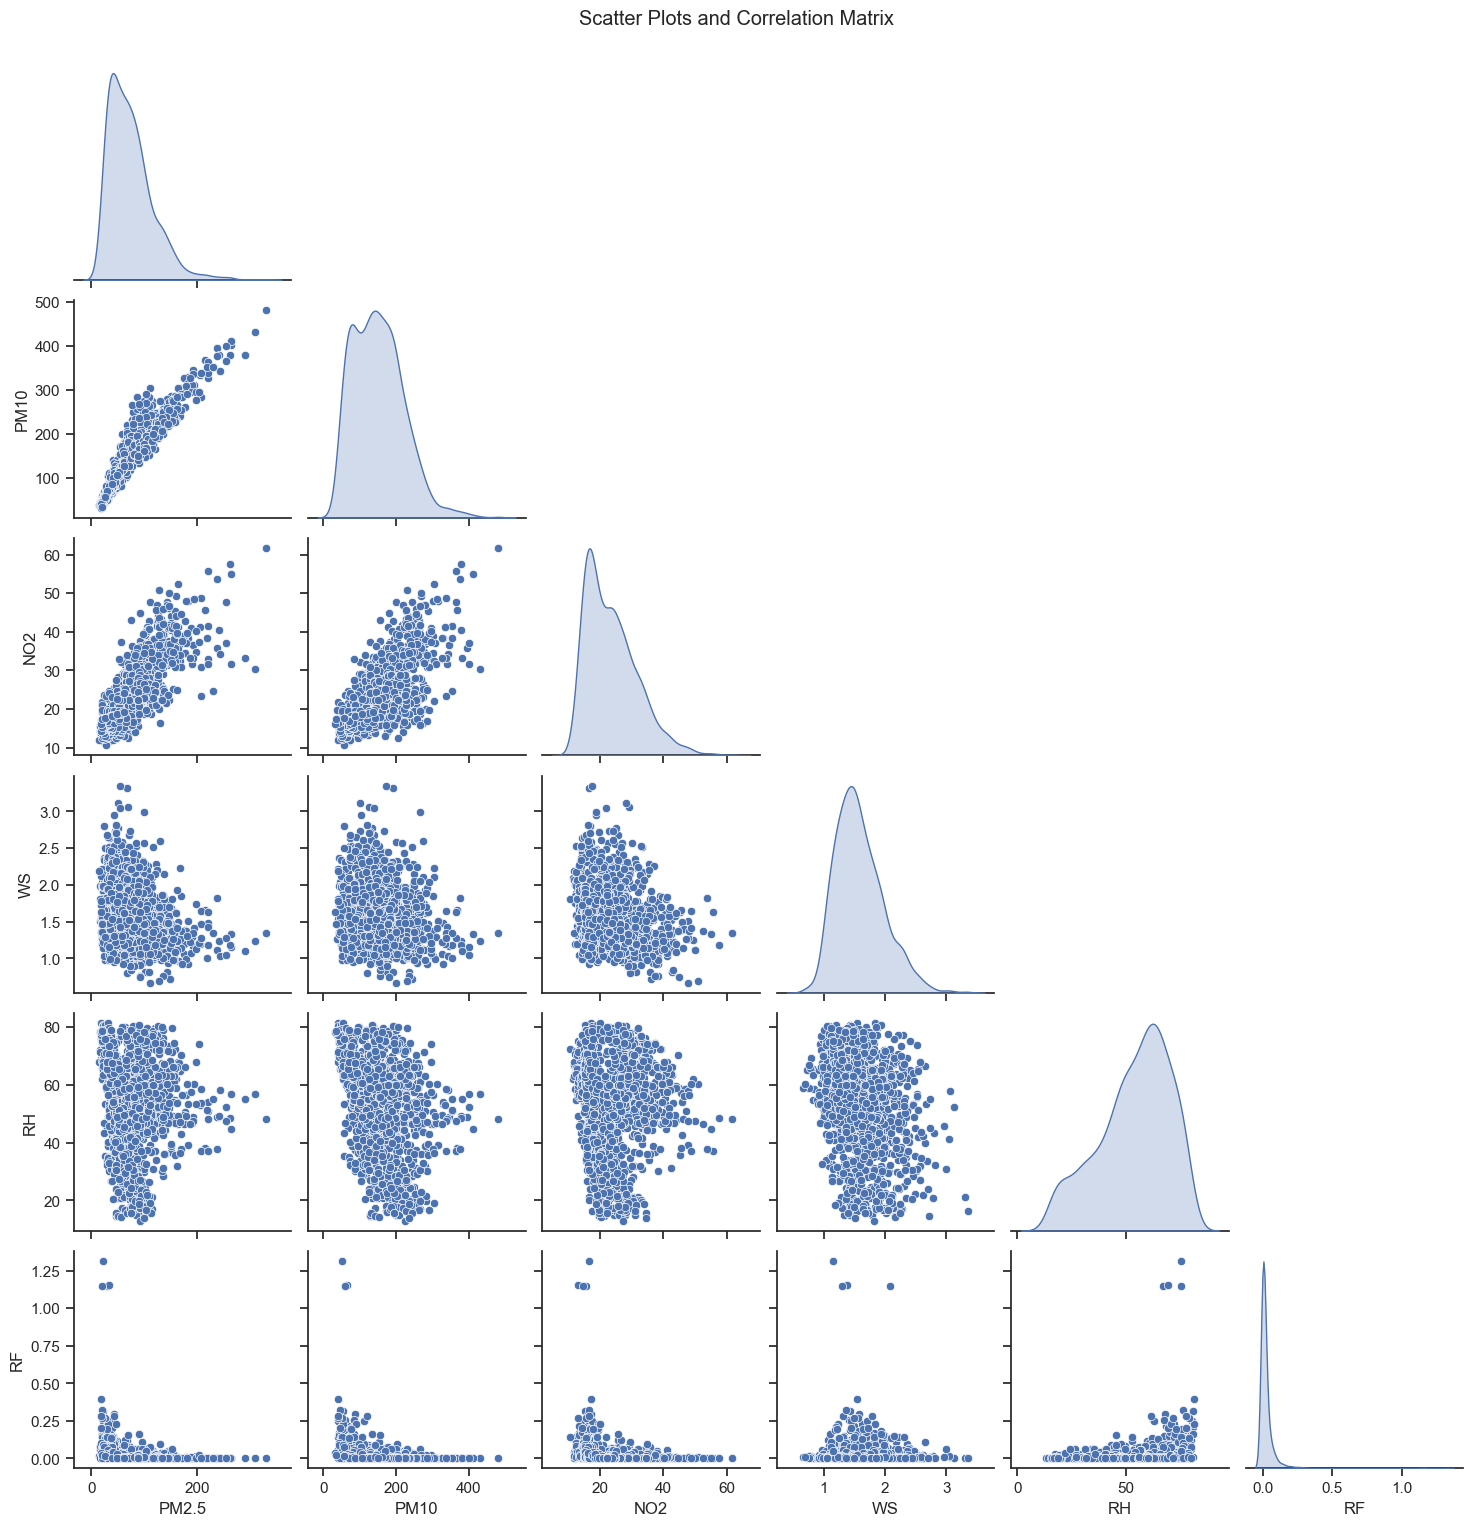

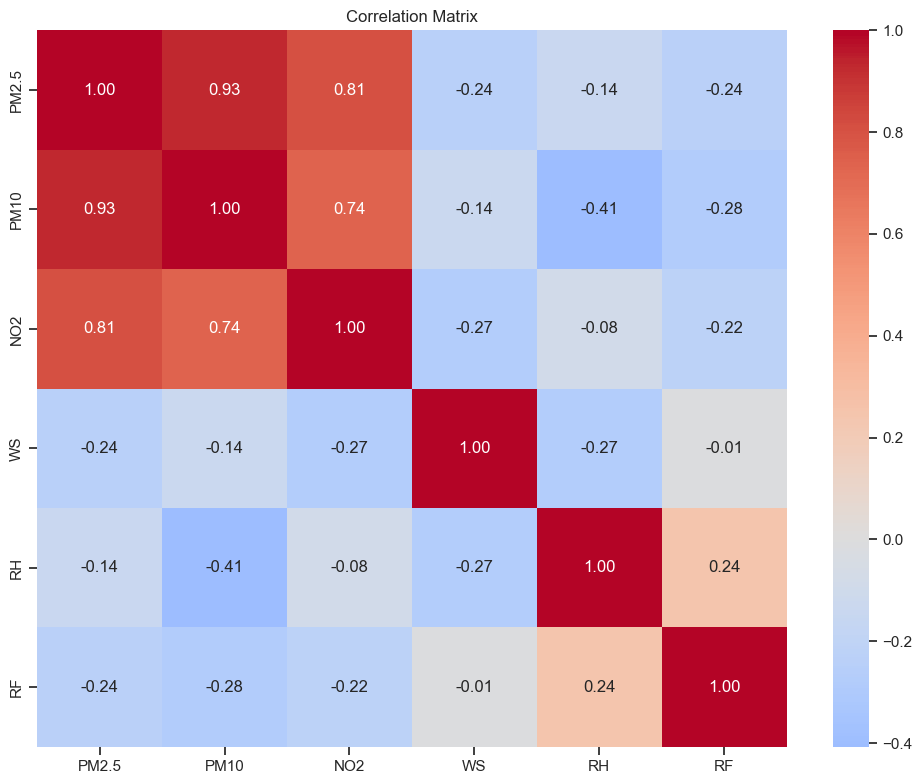

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="ticks")

# Plot scatter plots with enhanced aesthetics
relation_data = data[['PM2.5', 'PM10', 'NO2', 'WS', 'RH', 'RF']]
scatter_plot = sns.pairplot(relation_data, kind='scatter', corner=True, diag_kind='kde')
scatter_plot.fig.suptitle('Scatter Plots and Correlation Matrix', y=1.02)

# Enhance correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = relation_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Matrix')

# Show the plots
plt.tight_layout()
plt.show()


# Seasonal Correlation Plot

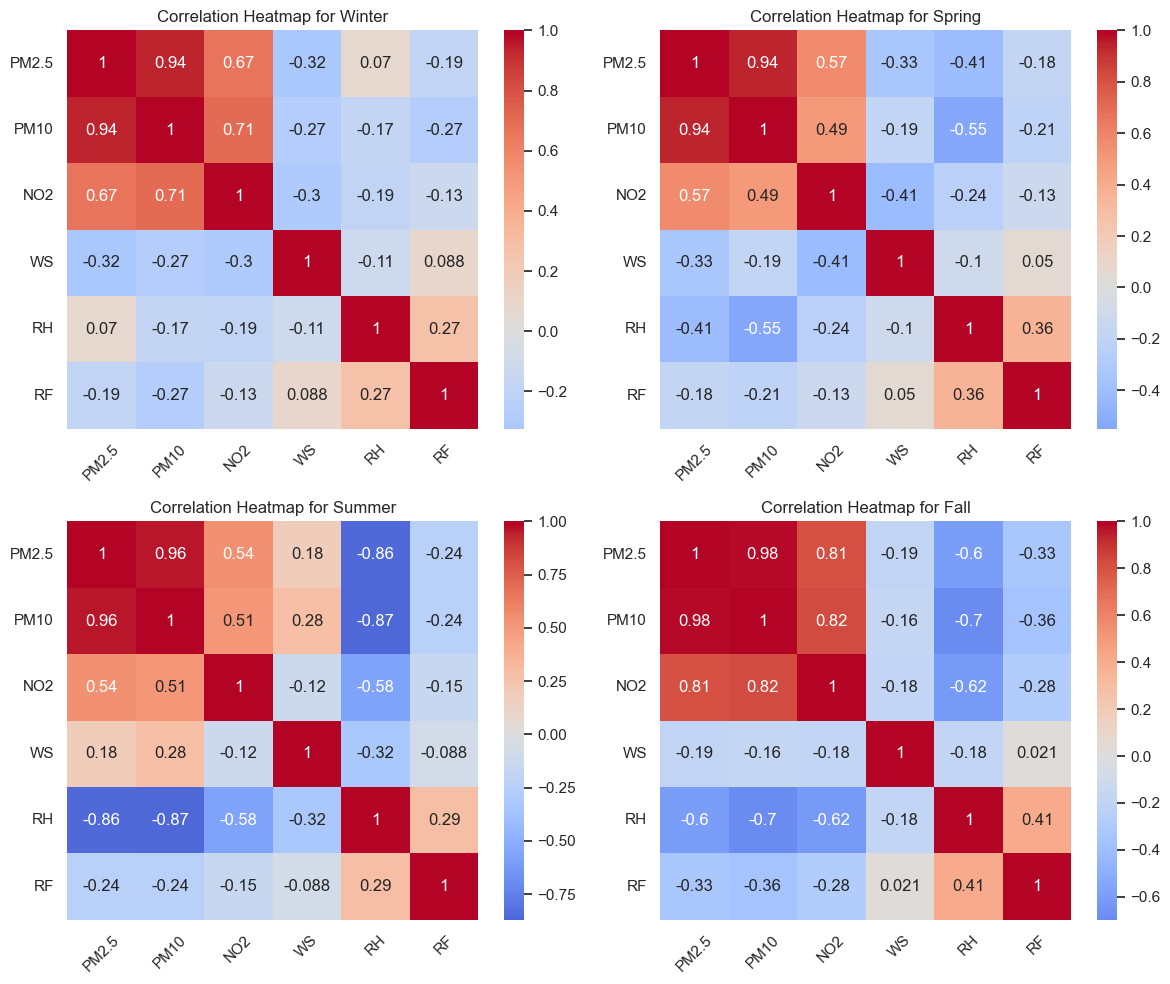

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame

# Convert 'From Date' to datetime format and set it as the index
data['From Date'] = pd.to_datetime(data['From Date'])
data.set_index('From Date', inplace=True)

# Define columns for correlation analysis
columns_to_correlate = ['PM2.5', 'PM10', 'NO2', 'WS', 'RH', 'RF']

# Create a new column for seasons based on month
data['Season'] = (data.index.month % 12 + 3) // 3
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
data['Season'] = data['Season'].map(season_names)

# Calculate correlations for each season
seasonal_correlations = {}
for season in data['Season'].unique():
    seasonal_data = data[data['Season'] == season]
    correlation_matrix = seasonal_data[columns_to_correlate].corr()
    seasonal_correlations[season] = correlation_matrix

# Customize style
sns.set(style='white')

# Create subplots for each season
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

for ax, (season, corr_matrix) in zip(axes.flatten(), seasonal_correlations.items()):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
    ax.set_title(f'Correlation Heatmap for {season}')
    ax.set_xticklabels(columns_to_correlate, rotation=45)
    ax.set_yticklabels(columns_to_correlate, rotation=0)

plt.tight_layout()
plt.show()


# Feature Importance

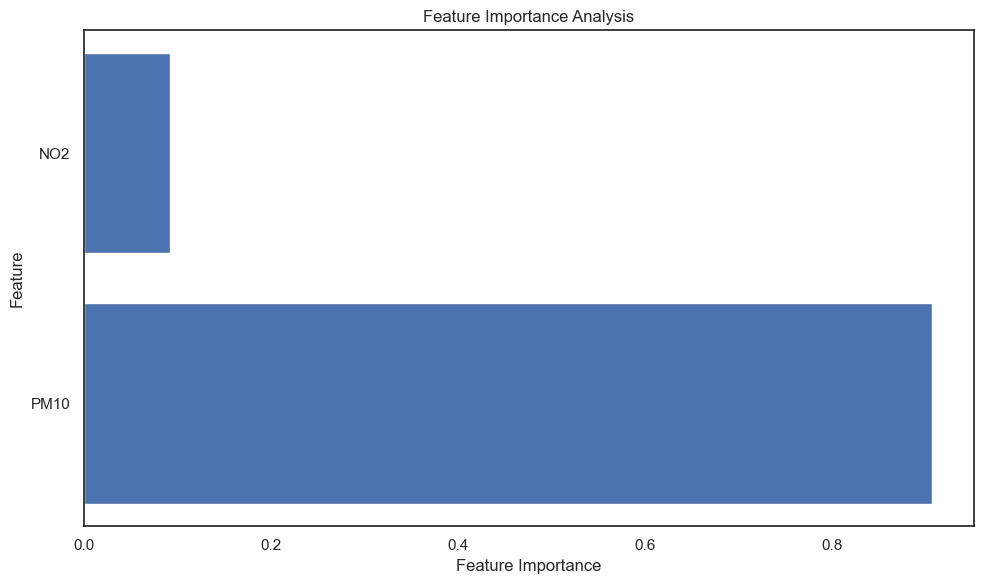

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assume 'X' is your feature matrix and 'y' is your target variable

# Initialize a Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.tight_layout()
plt.show()


In [71]:
data.columns

Index(['From Date', 'To Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'Ozone', 'RH',
       'WS', 'RF'],
      dtype='object')

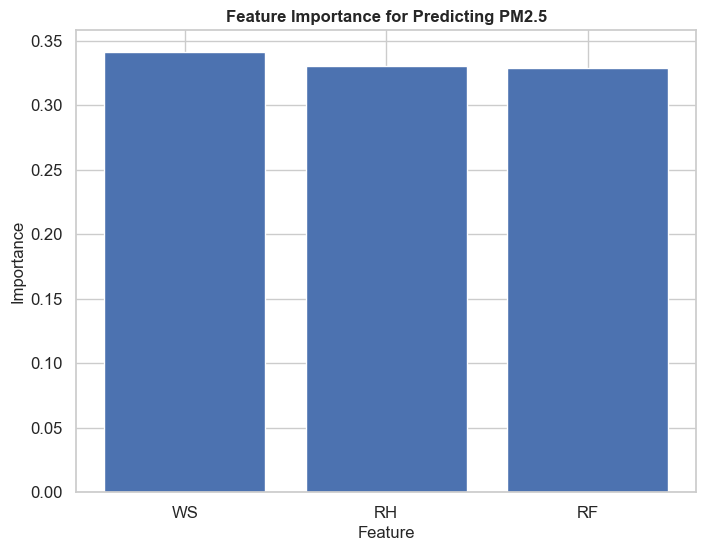

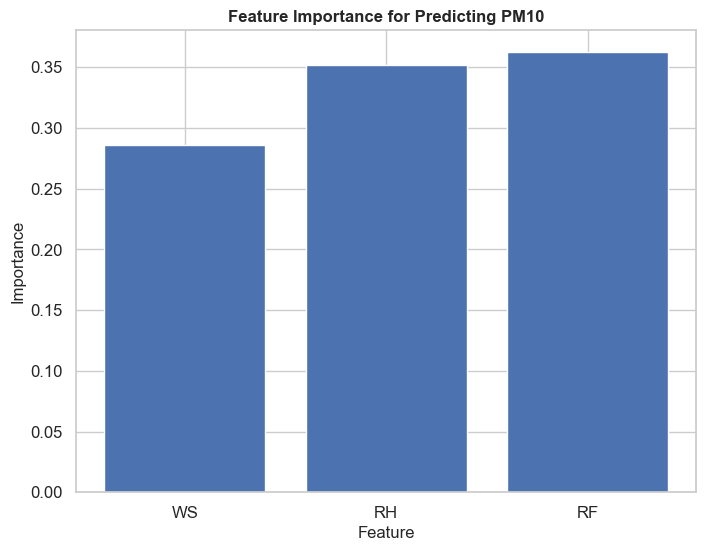

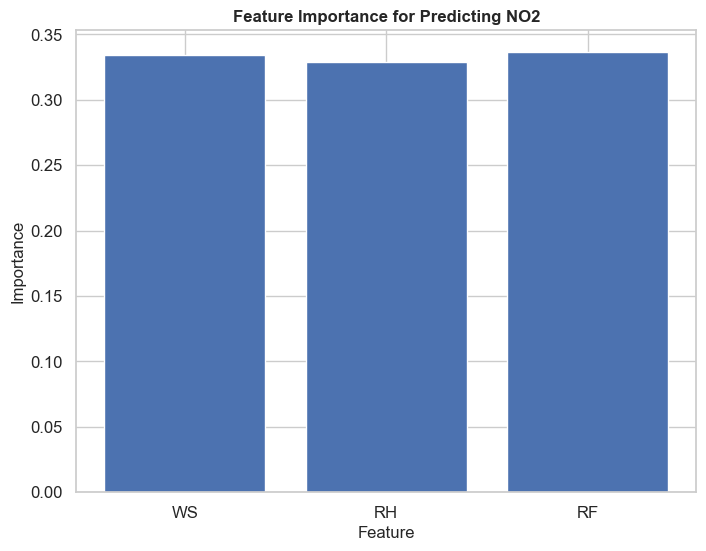

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assume 'data' is your DataFrame

# Convert 'From Date' to datetime format and set it as the index
data['From Date'] = pd.to_datetime(data['From Date'])
data.set_index('From Date', inplace=True)

# Define features (independent variables) and target variables (dependent variables)
features = ['WS', 'RH', 'RF']
targets = ['PM2.5', 'PM10', 'NO2']

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Initialize a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Feature importance analysis for each target variable
for target in targets:
    # Define features and target
    X = train_data[features]
    y = train_data[target]
    
    # Fit the Random Forest regressor
    rf_regressor.fit(X, y)
    
    # Get feature importances
    feature_importances = rf_regressor.feature_importances_
    
    # Create a bar plot to visualize feature importances
    plt.figure(figsize=(8, 6))
    plt.bar(features, feature_importances)
    plt.title(f'Feature Importance for Predicting {target}')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()


# Hyperparameter Tuning

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and features
target = 'PM2.5' 
features = ['NO2', 'PM10', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Initialize the model (XGBRegressor) and GridSearchCV
model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (XGBoost): {mse}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)


Mean Squared Error (XGBoost): 47.868275923319864
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and features
target = 'PM2.5' 
features = ['NO2', 'PM10', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

# Initialize and train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print(f'XGBoost Mean Squared Error: {xgb_mse}')


Random Forest Mean Squared Error: 51.29477712345384
Gradient Boosting Mean Squared Error: 52.21105260768914
XGBoost Mean Squared Error: 52.25921358826459


# Forecasting PM2.5 for 2023

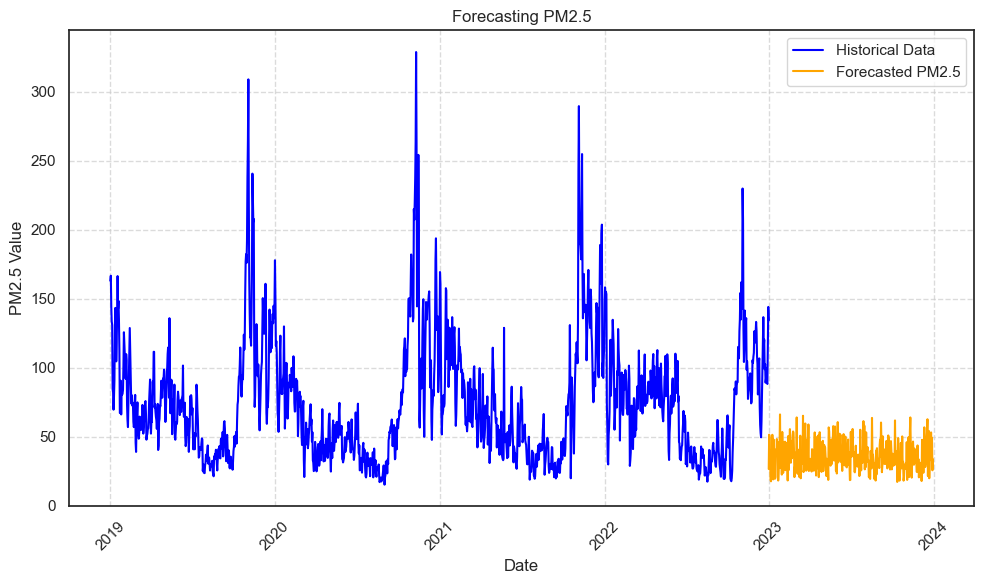

In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Define the target variable and features
target = 'PM2.5' 
features = ['NO2', 'PM10', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]

# Initialize and train Gradient Boosting model on the entire dataset
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

# Generate future dates for forecasting (adjust the number of forecasted days)
forecast_days = 365
last_date = data['from_date'].max()
future_dates = pd.date_range(last_date, periods=forecast_days, freq='D')

# Generate random future feature values for demonstration purposes
np.random.seed(42)
future_features = pd.DataFrame({
    'NO2': np.random.uniform(10, 50, forecast_days),
    'PM10': np.random.uniform(20, 100, forecast_days),
    'WS': np.random.uniform(1, 10, forecast_days),
    'RH': np.random.uniform(30, 80, forecast_days)
}, index=future_dates)

# Make predictions for the future dates using the trained model
forecasted_pm25 = gb_model.predict(future_features)

# Create a line plot to visualize the forecasted PM2.5 values
plt.figure(figsize=(10, 6))
plt.plot(data['from_date'], y, label='Historical Data', color='blue')
plt.plot(future_dates, forecasted_pm25, label='Forecasted PM2.5', color='orange')
plt.xlabel('Date')
plt.ylabel('PM2.5 Value')
plt.title('Forecasting PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hyperparamter tuning for pm10

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Define the target variable and features
target = 'PM10' 
features = ['NO2', 'PM2.5','WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# Initialize the model (XGBRegressor) and GridSearchCV
model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (XGBoost): {mse}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Mean Squared Error (XGBoost): 153.91152100084963
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.01, 'reg_lambda': 0, 'subsample': 0.8}


Mean Squared Error (Gradient Boosting): 159.04926548363514


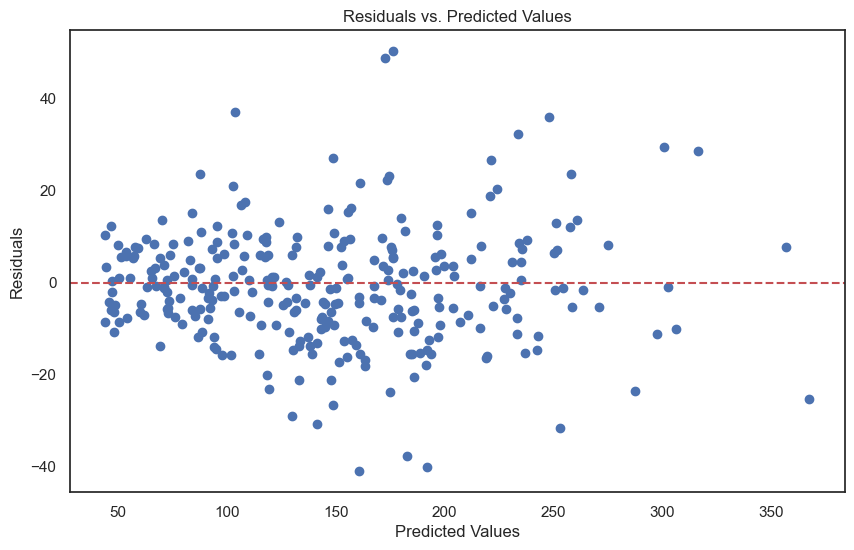

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assume data and preprocessing are already done

# Define the target variable and features
target = 'PM10'
features = ['NO2', 'PM2.5', 'WS', 'RH']

# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize the model (GradientBoostingRegressor)
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Gradient Boosting): {mse}')

# Residual analysis
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


# Forecasting PM10

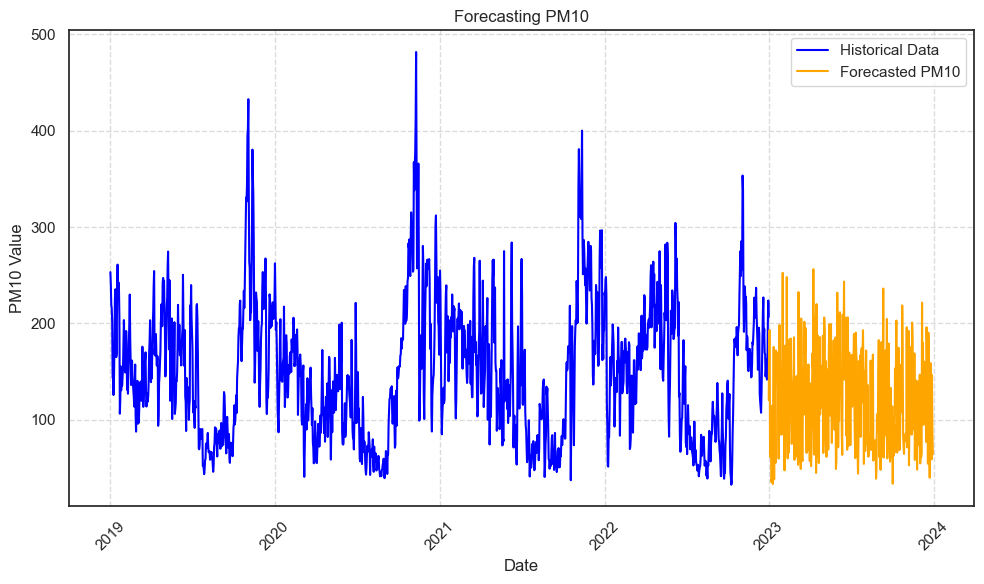

In [60]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Define the target variable and features
target = 'PM10' 
features = ['NO2', 'PM2.5', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]

# Initialize and train Gradient Boosting model on the entire dataset
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

# Generate future dates for forecasting (adjust the number of forecasted days)
forecast_days = 365
last_date = data['from_date'].max()
future_dates = pd.date_range(last_date, periods=forecast_days, freq='D')

# Generate random future feature values for demonstration purposes
np.random.seed(42)
future_features = pd.DataFrame({
    'NO2': np.random.uniform(10, 50, forecast_days),
    'PM2.5': np.random.uniform(20, 100, forecast_days),
    'WS': np.random.uniform(1, 10, forecast_days),
    'RH': np.random.uniform(30, 80, forecast_days)
}, index=future_dates)

# Make predictions for the future dates using the trained model
forecasted_pm10 = gb_model.predict(future_features)

# Create a line plot to visualize the forecasted PM10 values
plt.figure(figsize=(10, 6))
plt.plot(data['from_date'], y, label='Historical Data', color='blue')
plt.plot(future_dates, forecasted_pm10, label='Forecasted PM10', color='orange')
plt.xlabel('Date')
plt.ylabel('PM10 Value')
plt.title('Forecasting PM10')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Hyperparameter tuning for No2

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the target variable and features
target = 'NO2' 
features = ['PM2.5', 'PM10', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Initialize the model (XGBRegressor) and GridSearchCV
model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (XGBoost): {mse}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Mean Squared Error (XGBoost): 14.82756173079015
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}


# Forecasting NO2

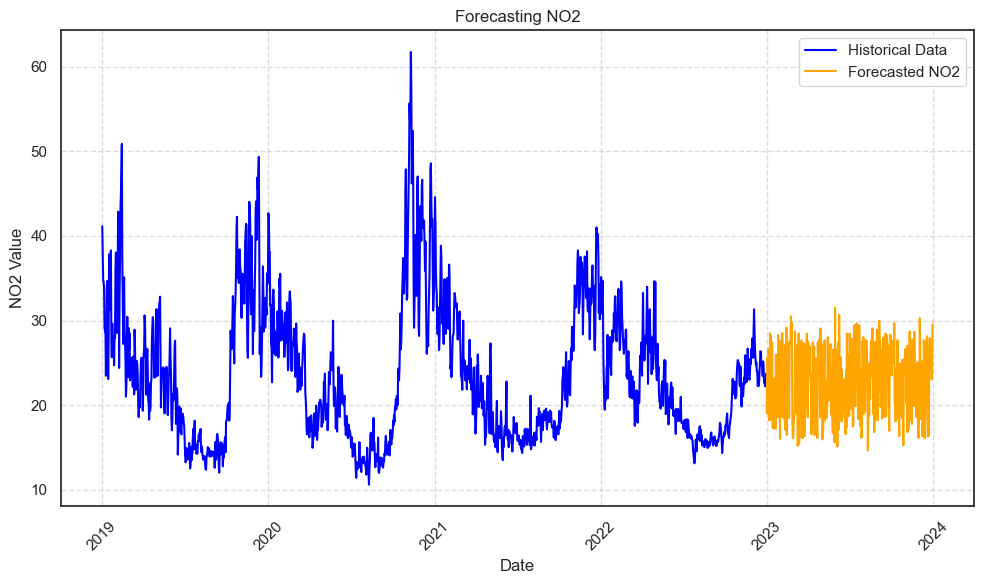

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Define the target variable and features
target = 'NO2' 
features = ['PM2.5', 'PM10', 'WS', 'RH']  # List of features

# Prepare data
X = data[features]
y = data[target]

# Initialize and train Gradient Boosting model on the entire dataset
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

# Generate future dates for forecasting (adjust the number of forecasted days)
forecast_days = 365
last_date = data['from_date'].max()
future_dates = pd.date_range(last_date, periods=forecast_days, freq='D')

# Generate random future feature values for demonstration purposes
np.random.seed(42)
future_features = pd.DataFrame({
    'PM2.5': np.random.uniform(20, 100, forecast_days),
    'PM10': np.random.uniform(20, 100, forecast_days),
    'WS': np.random.uniform(1, 10, forecast_days),
    'RH': np.random.uniform(30, 80, forecast_days)
}, index=future_dates)

# Make predictions for the future dates using the trained model
forecasted_no2 = gb_model.predict(future_features)

# Create a line plot to visualize the forecasted NO2 values
plt.figure(figsize=(10, 6))
plt.plot(data['from_date'], y, label='Historical Data', color='blue')
plt.plot(future_dates, forecasted_no2, label='Forecasted NO2', color='orange')
plt.xlabel('Date')
plt.ylabel('NO2 Value')
plt.title('Forecasting NO2')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ARIMA Forecasting for P

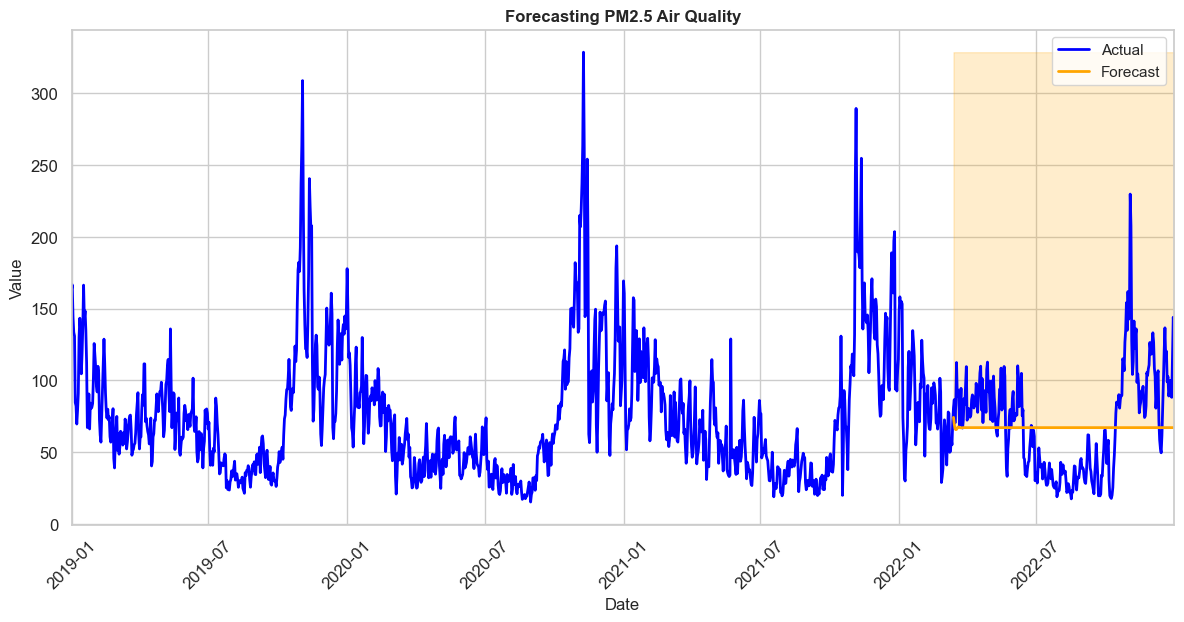

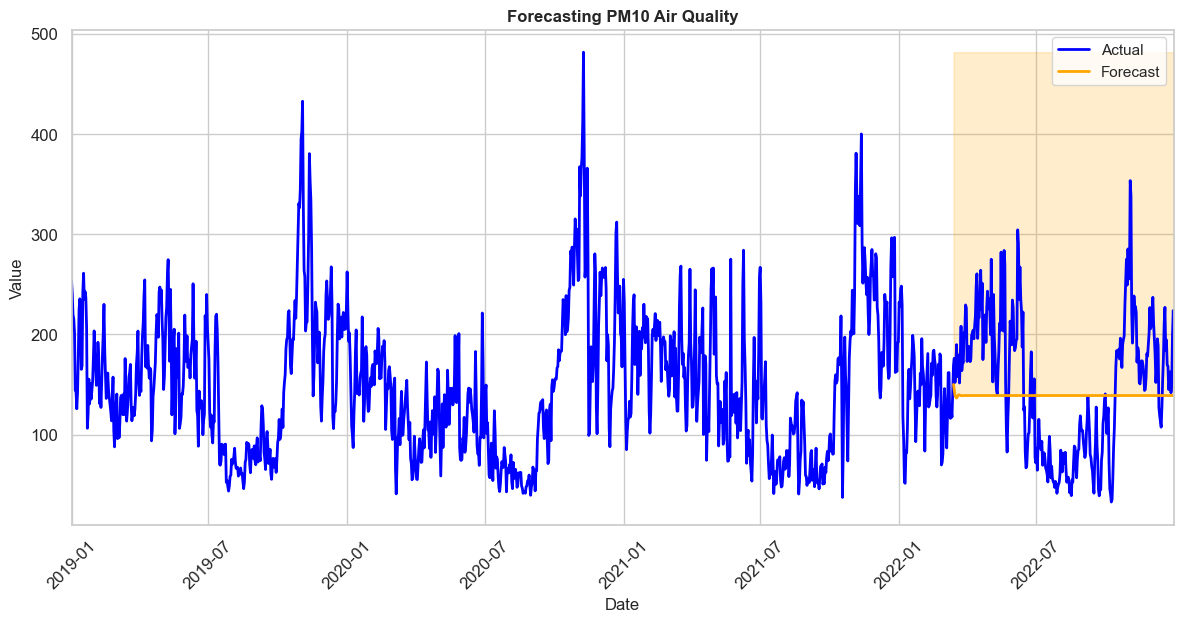

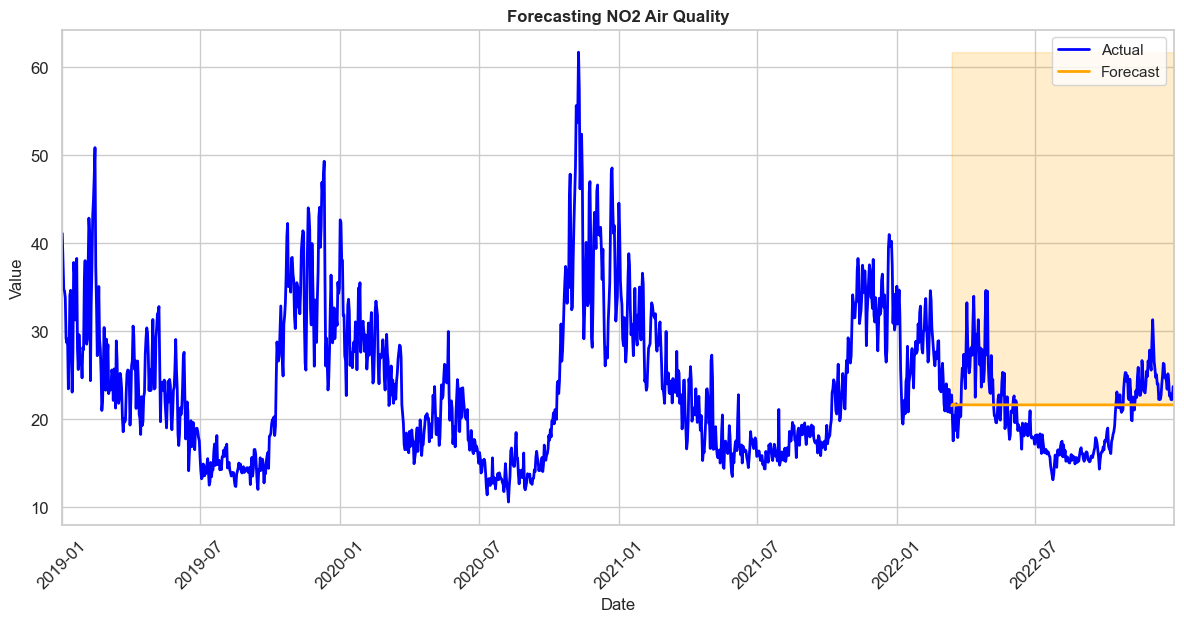

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Assume 'data' is your DataFrame

# Convert 'From Date' to datetime format and set it as the index
data['from_date'] = pd.to_datetime(data['from_date'])
data.set_index('from_date', inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# ARIMA order
order = (5, 1, 0)  # You may need to adjust the order based on the data

# Define parameters
parameters = ['PM2.5', 'PM10', 'NO2']

# Suppress warnings
warnings.filterwarnings("ignore")

# Customize style
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'

# Forecast and plot for each parameter
for parameter in parameters:
    # Fit ARIMA model
    model = ARIMA(train_data[parameter], order=order)
    model_fit = model.fit()

    # Forecast
    forecast_steps = len(test_data)
    forecast = model_fit.forecast(steps=forecast_steps)

    # Create date range for forecast
    forecast_dates = pd.date_range(start=test_data.index.min(), periods=forecast_steps, freq='D')

    # Create a customized plot
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[parameter], label='Actual', color='blue')
    plt.plot(forecast_dates, forecast, label='Forecast', color='orange')
    plt.fill_between(forecast_dates, forecast, data[parameter].max(), color='orange', alpha=0.2)
    plt.title(f'Forecasting {parameter} Air Quality')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.margins(x=0)
    plt.show()

# Reset warnings to default behavior
warnings.resetwarnings()


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

# Assume 'data' is your DataFrame

# Convert 'From Date' to datetime format and set it as the index
data['from_date'] = pd.to_datetime(data['from_date'])
data.set_index('from_date', inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Define parameters
parameters = ['PM2.5', 'PM10', 'NO2']

# Customize style
sns.set(style='whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'

# Fine-tuned SARIMA forecasting for each parameter
for parameter in parameters:
    # Define the parameter to forecast
    y = train_data[parameter]
    
    # Grid search for SARIMA parameters
    p_values = range(0, 3)
    d_values = range(1, 2)  # Keep d=1 to maintain stationarity
    q_values = range(0, 3)
    seasonal_values = [12]  # Assuming monthly seasonality
    
    best_aic = float("inf")
    best_order = None
    best_seasonal_order = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for seasonal in seasonal_values:
                    order = (p, d, q)
                    seasonal_order = (0, 1, 1, seasonal)
                    
                    try:
                        model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
                        model_fit = model.fit(disp=False)
                        aic = model_fit.aic
                        
                        if aic < best_aic:
                            best_aic = aic
                            best_order = order
                            best_seasonal_order = seasonal_order
                            
                    except:
                        continue
    
    # Fit SARIMA model with best parameters
    model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Forecast
    forecast_steps = len(test_data)
    forecast = model_fit.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Create date range for forecast
    forecast_dates = pd.date_range(start=test_data.index.min(), periods=forecast_steps, freq='D')

    # Create a customized plot
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[parameter], label='Actual', color='blue')
    plt.plot(forecast_dates, forecast_mean, label='Forecast', color='orange')
    plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1],
                     color='orange', alpha=0.2)
    plt.title(f'Forecasting {parameter} Air Quality using SARIMA')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.margins(x=0)
    plt.show()
    
# Reset warnings to default behavior
warnings.resetwarnings()


KeyError: 'from_date'